<a href="https://colab.research.google.com/github/dsalcure/DHAUZ/blob/main/Cancellation_Marcos_alcure.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [166]:
import pandas as pd 
import seaborn as  sns 
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.impute import KNNImputer
from imblearn.over_sampling import SMOTE
import numpy as np
from pycaret.classification import *
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt


In [167]:
df = pd.read_csv('/content/cancellation_prediction.csv')

In [168]:
#visao das colunas
df.columns

Index(['type', 'cancellation', 'days_between_booking_arrival',
       'year_arrival_date', 'month_arrival_date', 'week_number_arrival_date',
       'day_of_month_arrival_date', 'num_weekend_nights',
       'num_workweek_nights', 'num_adults', 'num_children', 'num_babies',
       'breakfast', 'country', 'market_segment', 'distribution_channel',
       'repeated_guest', 'num_previous_cancellations', 'num_previous_stays',
       'reserved_room', 'changes_between_booking_arrival', 'deposit_policy',
       'id_travel_agency_booking', 'id_person_booking', 'customer_type',
       'avg_price', 'required_car_parking_spaces',
       'total_of_special_requests'],
      dtype='object')

In [169]:

#Visualizacao geral dos dados
#obs: Tem uns valores absurdos, tipo numero de bebes 10, adultos 50....vou trabalhar isso quando fizer a busca por outliers.  

df.describe()

,cancellation,days_between_booking_arrival,year_arrival_date,week_number_arrival_date,day_of_month_arrival_date,num_weekend_nights,num_workweek_nights,num_adults,num_children,num_babies,...,repeated_guest,num_previous_cancellations,num_previous_stays,changes_between_booking_arrival,id_travel_agency_booking,id_person_booking,customer_type,avg_price,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,...,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,...,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,0.469512,101.718744,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,...,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,0.836030,47.823771,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,...,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,3.000000,300.000000,8.000000,5.000000


In [170]:
# Etapa 1.1 -   Verificação de existência de dados nulos:
#Obs: Foram identificadas as colunas country, id_travel_agency_booking e id_person_booking com valores nulos. Srão tratadas futuramente.
# Em relacao ao tipo do dado estao de acordo.
print(f'Número total de linhas no banco de dados = {df.shape[0]}\n')
print(f'Porcentagem de valores nulos por coluna:\n\n{(df.isnull().sum()/df.shape[0] *100).round(2)}\n\n')
print(f'Verificação do tipo de data:\n\n{df.dtypes}')

Número total de linhas no banco de dados = 119390

Porcentagem de valores nulos por coluna:

type                                0.00
cancellation                        0.00
days_between_booking_arrival        0.00
year_arrival_date                   0.00
month_arrival_date                  0.00
week_number_arrival_date            0.00
day_of_month_arrival_date           0.00
num_weekend_nights                  0.00
num_workweek_nights                 0.00
num_adults                          0.00
num_children                        0.00
num_babies                          0.00
breakfast                           0.00
country                             0.41
market_segment                      0.00
distribution_channel                0.00
repeated_guest                      0.00
num_previous_cancellations          0.00
num_previous_stays                  0.00
reserved_room                       0.00
changes_between_booking_arrival     0.00
deposit_policy                      0.00
id_tr

In [171]:
# Identificando as colunas nao numéricas 
nao_numerics = ['object', 'bool']
df_no_nnumeric = df.select_dtypes(include=nao_numerics)

In [172]:
# Verificando existência de dados nulos nos features nao numéricos e confirmando o dtype de cada coluna. 
df_no_nnumeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 6 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   type                119390 non-null  object
 1   month_arrival_date  119390 non-null  object
 2   breakfast           119390 non-null  bool  
 3   country             118902 non-null  object
 4   reserved_room       119390 non-null  object
 5   deposit_policy      119390 non-null  object
dtypes: bool(1), object(5)
memory usage: 4.7+ MB


In [173]:
# Verificando valores errôneos (exemplo: erro de digitação) 

#Nao foi identificado grafia errada, e como visto na tabela acima estão sem dados nulos e com o tipo correto. 

for i in df_no_nnumeric.columns:
    print(i, df_no_nnumeric[i].unique())

type ['Fancy Hotel' 'Hotel']
month_arrival_date ['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
breakfast [ True False]
country ['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' nan 'ROU' 'NOR' 'OMN' 'ARG' 'POL'
 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST'
 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR'
 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO'
 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM'
 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY'
 'KWT' 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN'
 'SYC' 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB'
 'CMR' 'BIH' 'MUS' 'COM' 'SUR' 'UGA' 'BGR' 'CIV' 'JOR' 'SYR' 'SGP' 'BDI'
 'SAU' 'VNM' 'PLW' 'QAT' 'EGY' 'PER' 'MLT' 'MWI' 'ECU' 'MDG' 'ISL' 'UZB'
 'NPL' 'BHS' 'MAC' 'TGO' 'TWN' 'DJI' 'STP' 'KNA' 'ETH' 'IRQ' 'HND' 'RWA'
 'KHM' 

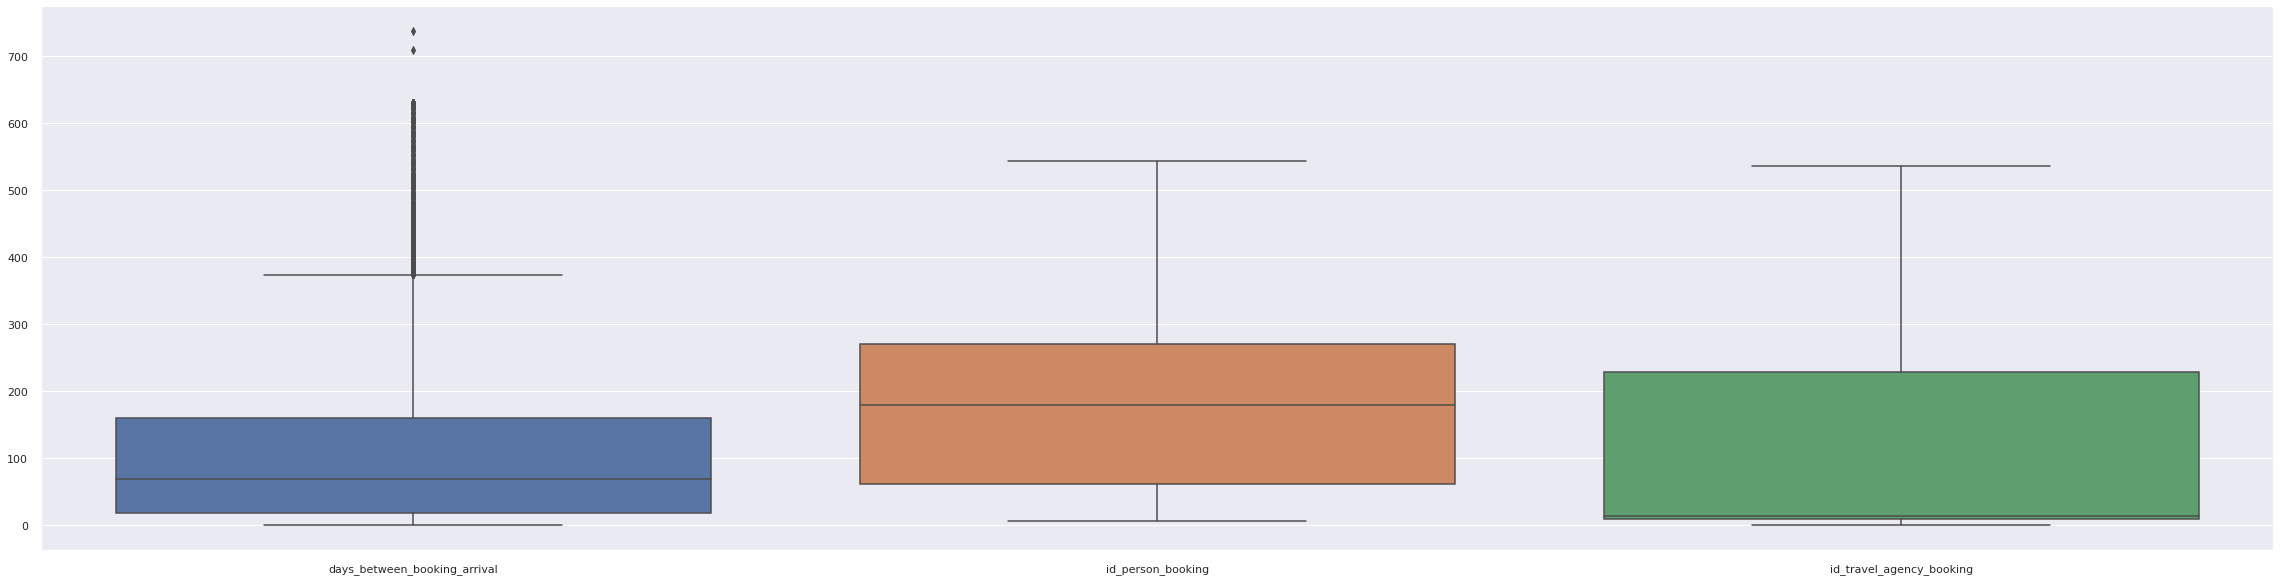

In [174]:
# Avaliando a existência de outliers nas colunas numéricas 1 de 2

# A ferramenta usada será o gráfico de boxplot.

numerics = ['int64', 'float64']
df_numeric = df.select_dtypes(include=numerics)
sns.set(rc={"figure.figsize":(40, 10)})
sns.boxplot(data=df_numeric[['days_between_booking_arrival','id_person_booking','id_travel_agency_booking']])

In [175]:
## Existência de Outliers  - days_between_booking_arrival 

c =(df[df['days_between_booking_arrival']>=380]['cancellation'].sum()/df[df['days_between_booking_arrival']>380].shape[0]*100).round(0)

n= (df[df['days_between_booking_arrival']>=380]['cancellation'].count()/df.shape[0]*100).round(2)

print('Existe outliers acima de 380 dias, nao é possivel dizer se é erro ou realmente pessoas que marcam suas viagens com bastante antecedencia, dessa forma nao me sinto confortavel em tira-los do modelo.\n')

print(f'Dos valores days_between_booking_arrival acima de 380 dias (outliers) existe uma prevalência muito grande para o cancelamento de {c} % \n')

print(f'Porem uma quantidade de clientes muito pequena de apenas {n}% do total.\n')


Existe outliers acima de 380 dias, nao é possivel dizer se é erro ou realmente pessoas que marcam suas viagens com bastante antecedencia, dessa forma nao me sinto confortavel em tira-los do modelo.

Dos valores days_between_booking_arrival acima de 380 dias (outliers) existe uma prevalência muito grande para o cancelamento de 67.0 % 

Porem uma quantidade de clientes muito pequena de apenas 2.35% do total.



In [176]:
# Calculo da taxa de cancelamento por periodo de tempo correspondente a 25% dos seus cliente

l=[]

t_18_18 = (df[df['days_between_booking_arrival']<=18]['cancellation'].sum()/df[df['days_between_booking_arrival']<=18].shape[0]*100).round(2)
t_19_69 = (df[(df['days_between_booking_arrival']>18) & (df['days_between_booking_arrival']<69)]['cancellation'].sum()/df[(df['days_between_booking_arrival']>18) & (df['days_between_booking_arrival']<69)].shape[0]*100).round(2)
t_70_160 = (df[(df['days_between_booking_arrival']>=69) & (df['days_between_booking_arrival']<160)]['cancellation'].sum()/df[(df['days_between_booking_arrival']>=69) & (df['days_between_booking_arrival']<160)].shape[0]*100).round(2)
t_161_380 = (df[(df['days_between_booking_arrival']>160) & (df['days_between_booking_arrival']<380)]['cancellation'].sum()/df[(df['days_between_booking_arrival']>160) & (df['days_between_booking_arrival']<380)].shape[0]*100).round(2)
t_ouliers = (df[df['days_between_booking_arrival']>=380]['cancellation'].sum()/df[df['days_between_booking_arrival']>=380].shape[0]*100).round(2)
x= [t_18_18,t_19_69,t_70_160,t_161_380,t_ouliers]
for i in x:
    l.append(i)
    l.append(i)
t= [18,18,19,69,70,160,161,380,381,730]

d = {'Tempo':t ,'% canelamento':l}

d_canelamento_tempo_reserva  = pd.DataFrame(data=d)

In [177]:
fig = px.line(d_canelamento_tempo_reserva, x="Tempo", y="% canelamento", title='Cancelamento em % x tempo de antecedencia da reserva')
fig.show()

print('''

A porcentagem de clientes que realizaram o cancelamento foi calculada por periodo de tempos segmentados usando informações dos quartis (conforme pode se verificar no describe):

tempo 0 -18 - 25% dos clientes
tempo 19- 69 - 25% dos clientes 
tempo 70 - 160 - 25% dos clientes 
tempo > 160 25% dos clientes
tempo > 380 - outliers 

Observa-se que a taxa de cancelamento cresce a medida em que o tempo entre a reseva e a data de chegada no hotel aumenta. 

Eu sugeriria quatro açõess ao proprietário do hotel: 

1 - Uma ação de marketing com descontos para quem fizesse a reserva para os proximos 20 dias tentando assim aumentar a quantidade de clientes para entrar nessa faixa de cancelamento de 14.64% (hoje temos 25% dos clientes nessa faixa)

2 - A partir do tempo de 70 dias de antecedência já temos uma taxa de cancelamento expressiva, eu sugeriria um pagamento adiantado e se permitido por lei a devolução parcial desse valor em caso de cancelamento.

3 - A partir do tempo de 160 dias tem-se uma desistência de mais de 54% além do citado no item dois sugeriria uma campanha de acompanhamento do cliente, envio de propagandas ações que conseguisse nao deixar esfriar a vontade do cliente em ir para o hotel. Menssagem avisando que o hotel o aguarda ...
pois é um cliente que o hotel não conquistou ainda. 

4- No caso de 380 dias de antecedência para cima, talvez seja mais interessante não abrir reservas, pois gera um custo operacional para empresa e pode perder clientes que mais a frente seriam hóspedes que nao cancelariam. Colocaria esses cllientes na lista de acompanhamento e informaria quando tivesse mais próximo as disponibilidades. 

 ''')



A porcentagem de clientes que realizaram o cancelamento foi calculada por periodo de tempos segmentados usando informações dos quartis (conforme pode se verificar no describe):

tempo 0 -18 - 25% dos clientes
tempo 19- 69 - 25% dos clientes 
tempo 70 - 160 - 25% dos clientes 
tempo > 160 25% dos clientes
tempo > 380 - outliers 

Observa-se que a taxa de cancelamento cresce a medida em que o tempo entre a reseva e a data de chegada no hotel aumenta. 

Eu sugeriria quatro açõess ao proprietário do hotel: 

1 - Uma ação de marketing com descontos para quem fizesse a reserva para os proximos 20 dias tentando assim aumentar a quantidade de clientes para entrar nessa faixa de cancelamento de 14.64% (hoje temos 25% dos clientes nessa faixa)

2 - A partir do tempo de 70 dias de antecedência já temos uma taxa de cancelamento expressiva, eu sugeriria um pagamento adiantado e se permitido por lei a devolução parcial desse valor em caso de cancelamento.

3 - A partir do tempo de 160 dias tem-se 

In [178]:
# Correlacao entre o cancelamento e o Tempo de reserva para a data da chegada, alto nivel de correlacao de 80,7%

print("Correlacao entre o cancelamento e o Tempo de reserva para a data da chegada, alto nivel de correlacao de 80,7%")

d_canelamento_tempo_reserva.corr()

Correlacao entre o cancelamento e o Tempo de reserva para a data da chegada, alto nivel de correlacao de 80,7%


,Tempo,% canelamento
Tempo,1.000000,0.807848
% canelamento,0.807848,1.000000


[Text(0, 0, 'cancellation'),
 Text(0, 0, 'week_number_arrival_date'),
 Text(0, 0, 'day_of_month_arrival_date'),
 Text(0, 0, 'num_weekend_nights'),
 Text(0, 0, 'num_workweek_nights'),
 Text(0, 0, 'num_adults'),
 Text(0, 0, 'num_children'),
 Text(0, 0, 'num_babies'),
 Text(0, 0, 'market_segment'),
 Text(0, 0, 'distribution_channel'),
 Text(0, 0, 'repeated_guest'),
 Text(0, 0, 'num_previous_cancellations'),
 Text(0, 0, 'num_previous_stays'),
 Text(0, 0, 'changes_between_booking_arrival'),
 Text(0, 0, 'customer_type'),
 Text(0, 0, 'avg_price'),
 Text(0, 0, 'required_car_parking_spaces'),
 Text(0, 0, 'total_of_special_requests')]

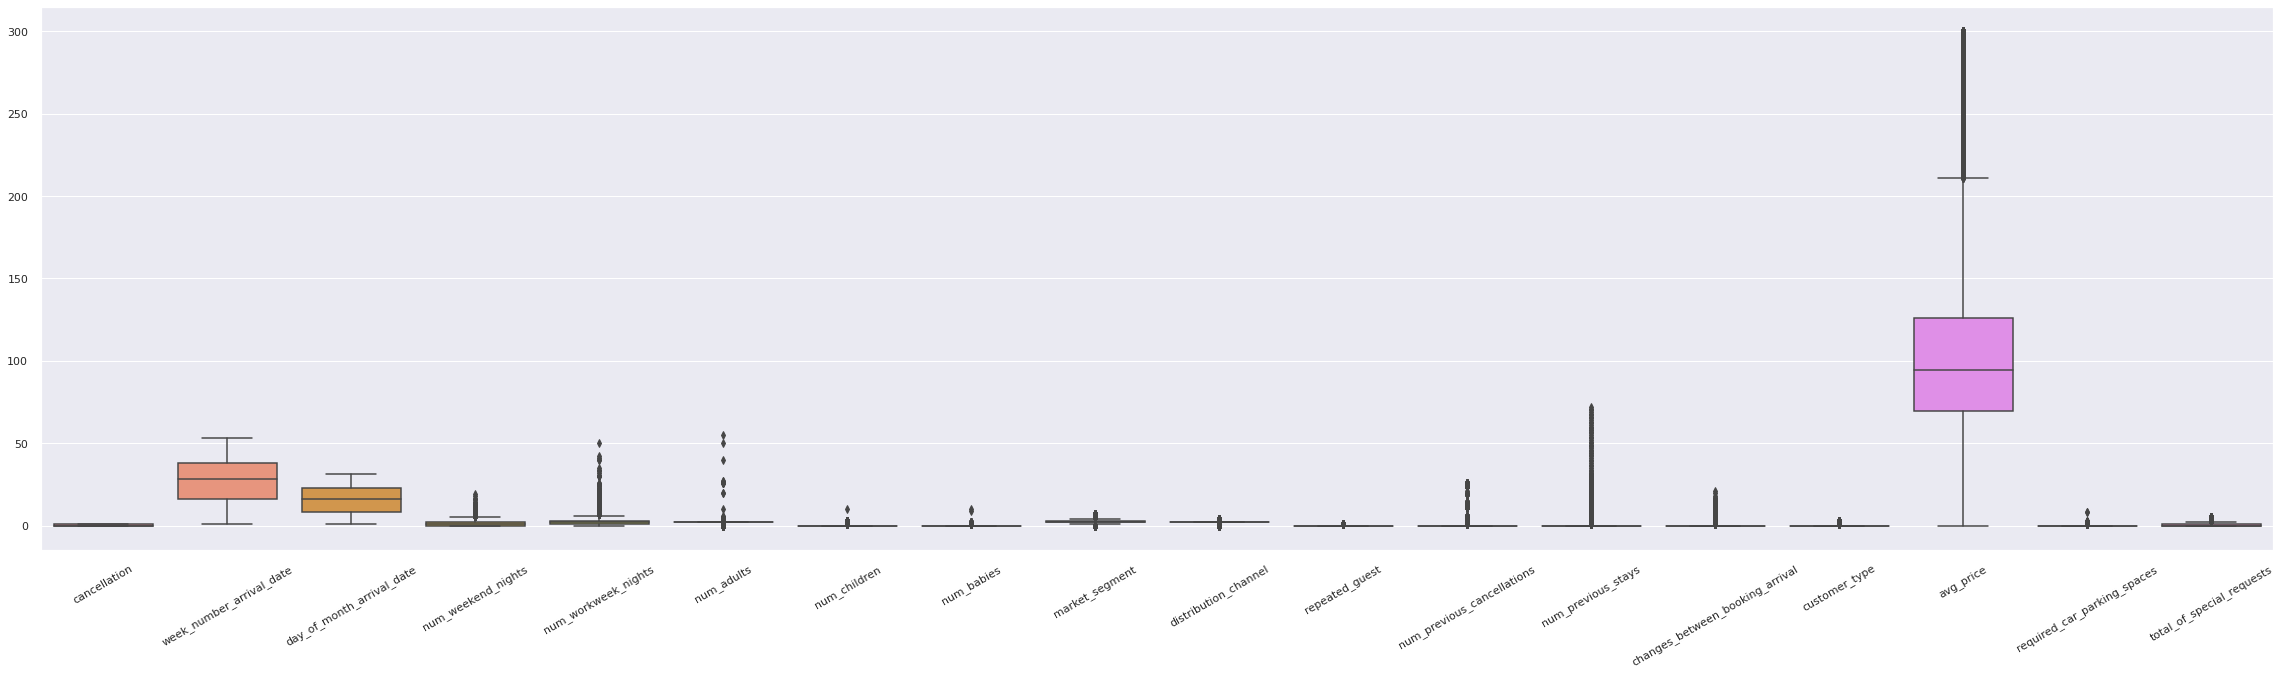

In [179]:
# Avaliando a existência de outliers nas colunas numéricas 2 de 2
ax = sns.boxplot(data=df_numeric[['cancellation', 'week_number_arrival_date', 'day_of_month_arrival_date','num_weekend_nights', 'num_workweek_nights', 'num_adults','num_children', 'num_babies', 'market_segment', 'distribution_channel','repeated_guest', 'num_previous_cancellations', 'num_previous_stays','changes_between_booking_arrival','customer_type', 'avg_price','required_car_parking_spaces', 'total_of_special_requests']])
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)

In [180]:
print(f"Valor maximo da hospedagem: {df_numeric['avg_price'].max()}")
print(f"Valor minimo da hospedagem: {df_numeric['avg_price'].min()}")
print("Nao faz sentido o valor da hospedagem ser zero, valor vai ser retirado.")

Valor maximo da hospedagem: 300.0
Valor minimo da hospedagem: 0.0
Nao faz sentido o valor da hospedagem ser zero, valor vai ser retirado.


In [181]:
# Taxa de cancelamento com a variacao media do preco
print('Apesar do Avg_price apresentar Outliers, esses foram mantidos no cálculo, pois pode ser que em algum momento especial por algum motivo ocorreu realmente o aumento de preço chegando no maximo a um valor de R$ 300 reais.')

valor=[]
cancelamento = []
for i in df_numeric['avg_price'].unique():
      valor.append(i)
      cancelamento.append((df[df['avg_price']==i]['cancellation'].sum()/df[df['avg_price']==i].shape[0]*100).round(2))

d = {'Avg_price':valor ,'% canelamento':cancelamento}

d_canelamento_avg_price  = pd.DataFrame(data=d)

Apesar do Avg_price apresentar Outliers, esses foram mantidos no cálculo, pois pode ser que em algum momento especial por algum motivo ocorreu realmente o aumento de preço chegando no maximo a um valor de R$ 300 reais.


In [182]:
print("Retirando valor de preço zero !")

d_canelamento_avg_price  =  d_canelamento_avg_price[d_canelamento_avg_price['Avg_price']!=0]


Retirando valor de preço zero !


In [183]:
# Correalcao entre o aumento do preco medio e o numero de cancelamento
d_canelamento_avg_price.corr()

print('Achei a correlacao 16% muito baixa, vou analisar a feature num_previous_stays para ver se consigo fazer uma recomendacao melhor.')

Achei a correlacao 16% muito baixa, vou analisar a feature num_previous_stays para ver se consigo fazer uma recomendacao melhor.


In [184]:
# Para o num_previous_stays vou retirar os outliers usando o intervalo de confianca de 95% 

print("Para o num_previous_stays retirei os outliers identificados no boxplot usando o intervalo de confianca de 95% ")

media_finan = df['num_previous_stays'].mean()
desvp_finan = df['num_previous_stays'].std()

df = df[(df['num_previous_stays']>= media_finan-(desvp_finan*3)) & (df['num_previous_stays'] <= media_finan+(desvp_finan*3))]

Para o num_previous_stays retirei os outliers identificados no boxplot usando o intervalo de confianca de 95% 


In [185]:
print(f"Após retirar os outliers o número max de estadias anterior ficou em {df['num_previous_stays'].max()}")


Após retirar os outliers o número max de estadias anterior ficou em 4


In [186]:
valor=[]
cancelamento = []
for i in df['num_previous_stays'].unique():
      valor.append(i)
      cancelamento.append((df[df['num_previous_stays']==i]['cancellation'].sum()/df[df['num_previous_stays']==i].shape[0]*100).round(2))

d = {'num_previous_stays':valor ,'% canelamento':cancelamento}

d_canelamento_num_previous_stays  = pd.DataFrame(data=d)

In [187]:
print("Existe uma alta correlacao entre o numero de estadias e a taxa de cancelamento de 70% observa-se que é inversa, ou seja quanto maior o número de estadias anterior o cliente tem  menor a chance do cliente cancelar")
d_canelamento_num_previous_stays.corr()

Existe uma alta correlacao entre o numero de estadias e a taxa de cancelamento de 70% observa-se que é inversa, ou seja quanto maior o número de estadias anterior o cliente tem  menor a chance do cliente cancelar


,num_previous_stays,% canelamento
num_previous_stays,1.000000,-0.707331
% canelamento,-0.707331,1.000000


In [188]:
print("""Ao vermos os valores na tabela abaixo, observa se que tem uma descontinuidade ou seja são grupos diferentes,

o primeiro grupo seria aqueles que nunca estiveram no hotel com uma taxa de cancelamento expressiva em torno de 38% 
e o segundo grupo sao os que ja visitaram o hotel o que faz com que a taxa de cancelamento seja bem menor em torno de 5%.
Esse fato é positivo, indica que os clientes que ja estiveram no hotel , gostaram da experiência uma vez que fazem um esforco maior para não cancelarem.

Eu proporia uma ação para o dono do hotel:

Trabalhar com esses clientes que ja estiveram no hotel, acessando as mídias sociais deles, tentando transforma-los em vetores de propaganda para o hotel.
Possivelmente esses clientes tiveram bons momentos no hotel e teriam prazer em divulgar. Uma acao dessas pode estimular a um novo hóspede a não cancelar.
Tentar manter por perto esses clientes oferecendo descontos (investimento em marketing).
Promocao de indicar um amigo e ganhar um desconto.

""")
d_canelamento_num_previous_stays

Ao vermos os valores na tabela abaixo, observa se que tem uma descontinuidade ou seja são grupos diferentes,

o primeiro grupo seria aqueles que nunca estiveram no hotel com uma taxa de cancelamento expressiva em torno de 38% 
e o segundo grupo sao os que ja visitaram o hotel o que faz com que a taxa de cancelamento seja bem menor em torno de 5%.
Esse fato é positivo, indica que os clientes que ja estiveram no hotel , gostaram da experiência uma vez que fazem um esforco maior para não cancelarem.

Eu proporia uma ação para o dono do hotel:

Trabalhar com esses clientes que ja estiveram no hotel, acessando as mídias sociais deles, tentando transforma-los em vetores de propaganda para o hotel.
Possivelmente esses clientes tiveram bons momentos no hotel e teriam prazer em divulgar. Uma acao dessas pode estimular a um novo hóspede a não cancelar.
Tentar manter por perto esses clientes oferecendo descontos (investimento em marketing).
Promocao de indicar um amigo e ganhar um desconto.




,num_previous_stays,% canelamento
0,0,38.03
1,1,5.12
2,2,5.52
3,3,5.11
4,4,5.24


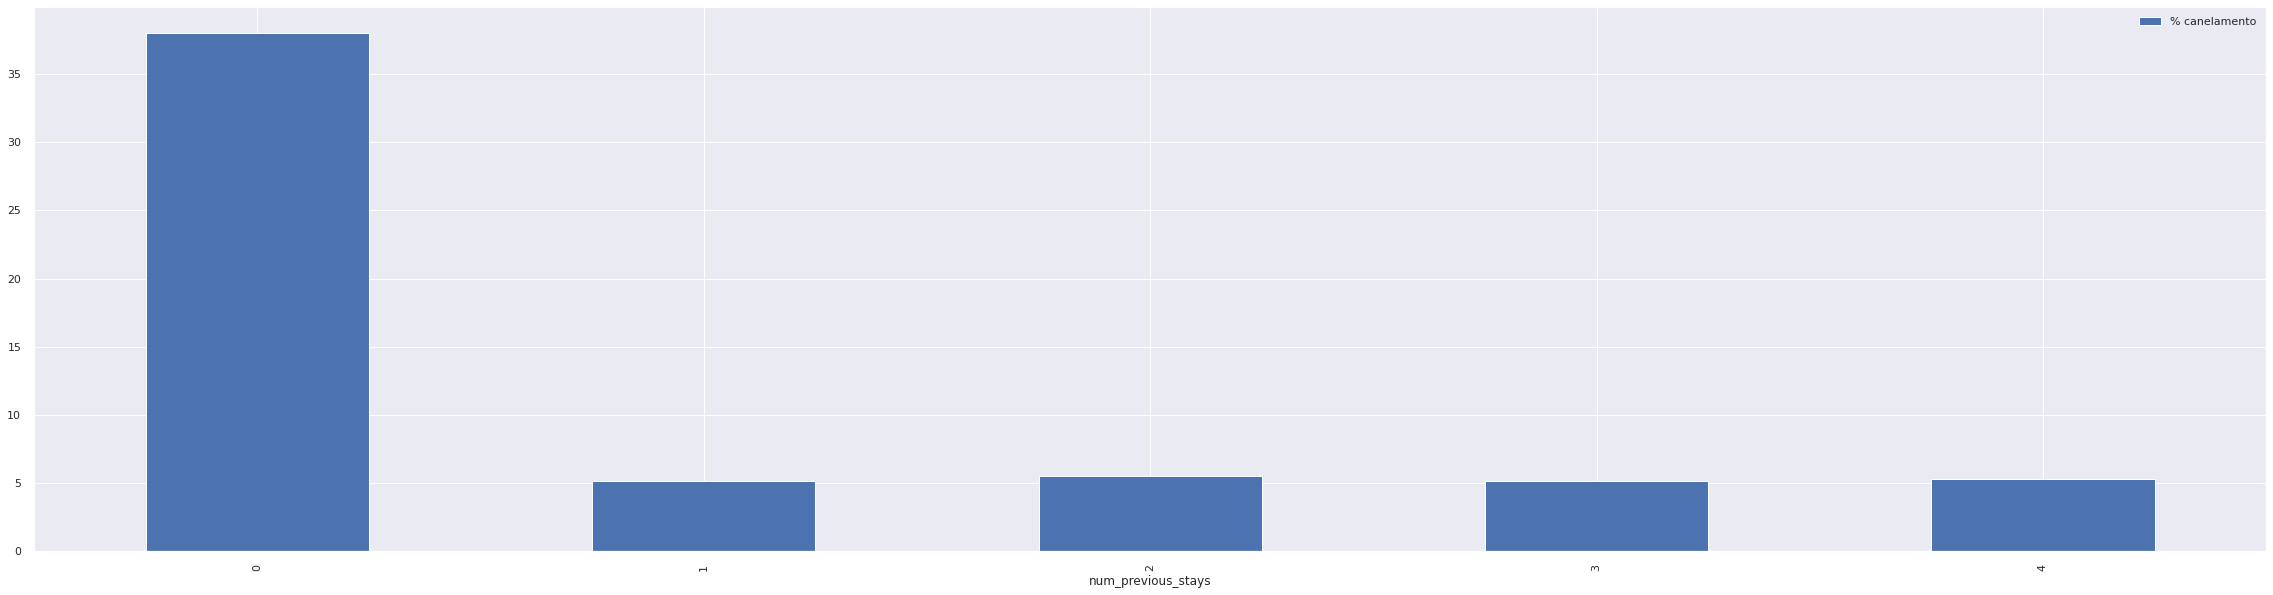

In [189]:
d_canelamento_num_previous_stays.plot.bar(x='num_previous_stays',y='% canelamento')

In [190]:
print("Poderia realizar analises nas outras features, mas o tempo é curto , vou seguir p fazer o modelo preditivo.")

Poderia realizar analises nas outras features, mas o tempo é curto , vou seguir p fazer o modelo preditivo.


In [191]:
print("""Como visto nos boxplots acima existe uma grande quantidade de features com outliers. Vou trata-los agora. 
Para tal vou assumir o intervalo de confianca de 95% , os dados que estiverem fora desse intervalo serão excluidos.""")


Como visto nos boxplots acima existe uma grande quantidade de features com outliers. Vou trata-los agora. 
Para tal vou assumir o intervalo de confianca de 95% , os dados que estiverem fora desse intervalo serão excluidos.


In [192]:
print("Dataframe somente com os valores numéricos, o único númerico que vou aceitar os outliers vai ser o 'avg_price', os outros irão entrar respeitar o intervalo de confianca de 95% ")

df_numeric = df_numeric[[ 'num_babies','cancellation', 'week_number_arrival_date', 'day_of_month_arrival_date','num_weekend_nights', 'num_workweek_nights', 'num_adults','num_children', 'market_segment', 'distribution_channel','repeated_guest',  'num_previous_stays','changes_between_booking_arrival','customer_type', 'required_car_parking_spaces', 'total_of_special_requests']]

Dataframe somente com os valores numéricos, o único númerico que vou aceitar os outliers vai ser o 'avg_price', os outros irão entrar respeitar o intervalo de confianca de 95% 


In [193]:
print("DataFrame com os Outliers removidos.")

for i in df_numeric:
  media_finan = df[i].mean()
  desvp_finan = df[i].std()
  df = df[(df[i] >= media_finan-(desvp_finan*3)) & (df[i] <= media_finan+(desvp_finan*3))]

DataFrame com os Outliers removidos.


In [194]:
## PRÉPROCESSAMENTO

In [195]:
print("""Vou transformar os valores nao numéricos (variáveis categóricas) em numéricos.

Para isso preciso definir se serão ordinais, ou seja, dotadas de uma ordem lógica ou qualitativa nominal onde não existe uma ordenação.

Vou identificar a % de cancelamento em cada uma dessas variáveis para ver se existe alguma lógica para ordenalos.""") 



Vou transformar os valores nao numéricos (variáveis categóricas) em numéricos.

Para isso preciso definir se serão ordinais, ou seja, dotadas de uma ordem lógica ou qualitativa nominal onde não existe uma ordenação.

Vou identificar a % de cancelamento em cada uma dessas variáveis para ver se existe alguma lógica para ordenalos.


In [196]:
for i in df_no_nnumeric.columns:
  print ((df.groupby(i)['cancellation'].sum()/df.groupby(i)['cancellation'].count()).round(2))

type
Fancy Hotel    0.33
Hotel          0.44
Name: cancellation, dtype: float64
month_arrival_date
April        0.45
August       0.42
December     0.39
February     0.38
January      0.35
July         0.41
June         0.46
March        0.36
May          0.44
November     0.35
October      0.41
September    0.43
Name: cancellation, dtype: float64
breakfast
False    0.39
True     0.42
Name: cancellation, dtype: float64
country
ABW    0.00
AGO    0.43
ALB    0.20
AND    1.00
ARE    0.86
       ... 
VGB    1.00
VNM    0.25
ZAF    0.36
ZMB    1.00
ZWE    0.33
Name: cancellation, Length: 172, dtype: float64
reserved_room
A    0.43
B    0.31
C    0.35
D    0.36
E    0.37
F    0.25
G    0.32
H    0.58
L    0.25
Name: cancellation, dtype: float64
deposit_policy
No Deposit    0.31
Non Refund    0.99
Refundable    0.21
Name: cancellation, dtype: float64


In [197]:
# type - Foi considerado que o Fancy Hotel tem uma menor chance de cancelamento (dessa forma será ordenado de forma ordinária.)
df['type'].replace({'Fancy Hotel':0 ,'Hotel':1}, inplace=True)        

In [198]:
# month_arrival_date - Existe uma sequência temporal (dessa forma será ordenado de forma ordinária)

df['month_arrival_date'].replace({'January':1,'February':2 ,'March':3 ,'April':4,'May':5, 'June':6 ,'July':7, 'August':8 ,'September':9,'October': 10 , 'November':11,'December':12 }, inplace=True)   

In [199]:
# deposit_policy - Foi considerei que o Non Refund, No Deposit, Non Refund estão em ordem crescente de risco de cancelamento (dessa forma será ordenado de forma ordinária.)

df['deposit_policy'].replace({'Refundable':0 ,'No Deposit':1 ,'Non Refund':2}, inplace=True)    



In [200]:
# reserved_room , country e breakfast - vou considerar sem ordenação (para isso vou usar a função get_dummies).

#Tirando de boleano para poder usar o dummy
df['breakfast'].replace({True:'T',False:'F'},inplace=True)


dummy = pd.get_dummies(df[['reserved_room','country','breakfast']])
df = pd.merge(
    left=df,
    right=dummy,
    left_index=True,
    right_index=True,)

df.drop(columns=['reserved_room','country','breakfast'],inplace=True)

In [201]:
pd.set_option('display.max_columns', None)
df.head(5)

,type,cancellation,days_between_booking_arrival,year_arrival_date,month_arrival_date,week_number_arrival_date,day_of_month_arrival_date,num_weekend_nights,num_workweek_nights,num_adults,num_children,num_babies,market_segment,distribution_channel,repeated_guest,num_previous_cancellations,num_previous_stays,changes_between_booking_arrival,deposit_policy,id_travel_agency_booking,id_person_booking,customer_type,avg_price,required_car_parking_spaces,total_of_special_requests,reserved_room_A,reserved_room_B,reserved_room_C,reserved_room_D,reserved_room_E,reserved_room_F,reserved_room_G,reserved_room_H,reserved_room_L,country_ABW,country_AGO,country_ALB,country_AND,country_ARE,country_ARG,country_ARM,country_ASM,country_ATA,country_ATF,country_AUS,country_AUT,country_AZE,country_BDI,country_BEL,country_BEN,country_BFA,country_BGD,country_BGR,country_BHR,country_BHS,country_BIH,country_BLR,country_BOL,country_BRA,country_BRB,country_CAF,country_CHE,country_CHL,country_CHN,country_CIV,country_CMR,country_CN,country_COL,country_COM,country_CPV,country_CRI,country_CUB,country_CYM,country_CYP,country_CZE,country_DEU,country_DMA,country_DNK,country_DOM,country_DZA,country_ECU,country_EGY,country_ESP,country_EST,country_ETH,country_FIN,country_FRA,country_FRO,country_GAB,country_GBR,country_GEO,country_GGY,country_GHA,country_GIB,country_GLP,country_GNB,country_GRC,country_GTM,country_GUY,country_HKG,country_HND,country_HRV,country_HUN,country_IDN,country_IMN,country_IND,country_IRL,country_IRN,country_IRQ,country_ISL,country_ISR,country_ITA,country_JAM,country_JEY,country_JOR,country_JPN,country_KAZ,country_KEN,country_KHM,country_KIR,country_KNA,country_KOR,country_KWT,country_LAO,country_LBN,country_LBY,country_LCA,country_LIE,country_LKA,country_LTU,country_LUX,country_LVA,country_MAC,country_MAR,country_MCO,country_MDG,country_MDV,country_MEX,country_MKD,country_MLI,country_MLT,country_MMR,country_MNE,country_MOZ,country_MRT,country_MUS,country_MYS,country_MYT,country_NAM,country_NCL,country_NGA,country_NIC,country_NLD,country_NOR,country_NPL,country_NZL,country_OMN,country_PAK,country_PAN,country_PER,country_PHL,country_PLW,country_POL,country_PRI,country_PRT,country_PRY,country_PYF,country_QAT,country_ROU,country_RUS,country_RWA,country_SAU,country_SDN,country_SEN,country_SGP,country_SLE,country_SLV,country_SMR,country_SRB,country_STP,country_SUR,country_SVK,country_SVN,country_SWE,country_SYC,country_SYR,country_TGO,country_THA,country_TJK,country_TMP,country_TUN,country_TUR,country_TWN,country_TZA,country_UGA,country_UKR,country_UMI,country_URY,country_USA,country_UZB,country_VEN,country_VGB,country_VNM,country_ZAF,country_ZMB,country_ZWE,breakfast_F,breakfast_T
2,0,0,7,2015,7,27,1,0,1,1,0.0,0,0,0,0,0,0,0,1,NaN,NaN,0,75.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,0,13,2015,7,27,1,0,1,1,0.0,0,1,1,0,0,0,0,1,304.0,NaN,0,75.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,0,14,2015,7,27,1,0,2,2,0.0,0,2,2,0,0,0,0,1,240.0,NaN,0,98.0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [202]:
# vou retirar a coluna id_person_booking (informação de id de cliente nao ajuda na criação do ML)

#obs: id_travel_agency_booking retirei pq estava dando um trabalho computacional muito grande p preencher os vazios. Com fim didatico eu retirei, numa simulacao real eu pagaria esse custo. 

df.drop(columns=['id_person_booking','id_travel_agency_booking'], inplace=True)


In [203]:
# Normalizando os valores em escalas diferentes aqui vou usar o MaxMinScaler

scaler = MinMaxScaler()
scaled = scaler.fit_transform(df)

df_normalizado = pd.DataFrame(scaled, columns = df.columns)

In [204]:
df_normalizado

,type,cancellation,days_between_booking_arrival,year_arrival_date,month_arrival_date,week_number_arrival_date,day_of_month_arrival_date,num_weekend_nights,num_workweek_nights,num_adults,num_children,num_babies,market_segment,distribution_channel,repeated_guest,num_previous_cancellations,num_previous_stays,changes_between_booking_arrival,deposit_policy,customer_type,avg_price,required_car_parking_spaces,total_of_special_requests,reserved_room_A,reserved_room_B,reserved_room_C,reserved_room_D,reserved_room_E,reserved_room_F,reserved_room_G,reserved_room_H,reserved_room_L,country_ABW,country_AGO,country_ALB,country_AND,country_ARE,country_ARG,country_ARM,country_ASM,country_ATA,country_ATF,country_AUS,country_AUT,country_AZE,country_BDI,country_BEL,country_BEN,country_BFA,country_BGD,country_BGR,country_BHR,country_BHS,country_BIH,country_BLR,country_BOL,country_BRA,country_BRB,country_CAF,country_CHE,country_CHL,country_CHN,country_CIV,country_CMR,country_CN,country_COL,country_COM,country_CPV,country_CRI,country_CUB,country_CYM,country_CYP,country_CZE,country_DEU,country_DMA,country_DNK,country_DOM,country_DZA,country_ECU,country_EGY,country_ESP,country_EST,country_ETH,country_FIN,country_FRA,country_FRO,country_GAB,country_GBR,country_GEO,country_GGY,country_GHA,country_GIB,country_GLP,country_GNB,country_GRC,country_GTM,country_GUY,country_HKG,country_HND,country_HRV,country_HUN,country_IDN,country_IMN,country_IND,country_IRL,country_IRN,country_IRQ,country_ISL,country_ISR,country_ITA,country_JAM,country_JEY,country_JOR,country_JPN,country_KAZ,country_KEN,country_KHM,country_KIR,country_KNA,country_KOR,country_KWT,country_LAO,country_LBN,country_LBY,country_LCA,country_LIE,country_LKA,country_LTU,country_LUX,country_LVA,country_MAC,country_MAR,country_MCO,country_MDG,country_MDV,country_MEX,country_MKD,country_MLI,country_MLT,country_MMR,country_MNE,country_MOZ,country_MRT,country_MUS,country_MYS,country_MYT,country_NAM,country_NCL,country_NGA,country_NIC,country_NLD,country_NOR,country_NPL,country_NZL,country_OMN,country_PAK,country_PAN,country_PER,country_PHL,country_PLW,country_POL,country_PRI,country_PRT,country_PRY,country_PYF,country_QAT,country_ROU,country_RUS,country_RWA,country_SAU,country_SDN,country_SEN,country_SGP,country_SLE,country_SLV,country_SMR,country_SRB,country_STP,country_SUR,country_SVK,country_SVN,country_SWE,country_SYC,country_SYR,country_TGO,country_THA,country_TJK,country_TMP,country_TUN,country_TUR,country_TWN,country_TZA,country_UGA,country_UKR,country_UMI,country_URY,country_USA,country_UZB,country_VEN,country_VGB,country_VNM,country_ZAF,country_ZMB,country_ZWE,breakfast_F,breakfast_T
0,0.0,0.0,0.011129,0.0,0.545455,0.500000,0.000000,0.000000,0.166667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.250000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.020668,0.0,0.545455,0.500000,0.000000,0.000000,0.166667,0.0,0.0,0.0,0.2,0.5,0.0,0.0,0.0,0.0,0.5,0.0,0.250000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

In [205]:
# Foram encontrados valores nulos nas colunas [country, id_travel_agency_booking] preenchendos esses valores com KNNImputer (vizinhos mais proximos)

nan = np.nan
imputer = KNNImputer(n_neighbors=2, weights="uniform")
df_numbers_nan = imputer.fit_transform(scaled)
df_normalizado_nulos_tratados  = pd.DataFrame(df_numbers_nan, columns = df.columns)

In [206]:
df_normalizado_nulos_tratados

,type,cancellation,days_between_booking_arrival,year_arrival_date,month_arrival_date,week_number_arrival_date,day_of_month_arrival_date,num_weekend_nights,num_workweek_nights,num_adults,num_children,num_babies,market_segment,distribution_channel,repeated_guest,num_previous_cancellations,num_previous_stays,changes_between_booking_arrival,deposit_policy,customer_type,avg_price,required_car_parking_spaces,total_of_special_requests,reserved_room_A,reserved_room_B,reserved_room_C,reserved_room_D,reserved_room_E,reserved_room_F,reserved_room_G,reserved_room_H,reserved_room_L,country_ABW,country_AGO,country_ALB,country_AND,country_ARE,country_ARG,country_ARM,country_ASM,country_ATA,country_ATF,country_AUS,country_AUT,country_AZE,country_BDI,country_BEL,country_BEN,country_BFA,country_BGD,country_BGR,country_BHR,country_BHS,country_BIH,country_BLR,country_BOL,country_BRA,country_BRB,country_CAF,country_CHE,country_CHL,country_CHN,country_CIV,country_CMR,country_CN,country_COL,country_COM,country_CPV,country_CRI,country_CUB,country_CYM,country_CYP,country_CZE,country_DEU,country_DMA,country_DNK,country_DOM,country_DZA,country_ECU,country_EGY,country_ESP,country_EST,country_ETH,country_FIN,country_FRA,country_FRO,country_GAB,country_GBR,country_GEO,country_GGY,country_GHA,country_GIB,country_GLP,country_GNB,country_GRC,country_GTM,country_GUY,country_HKG,country_HND,country_HRV,country_HUN,country_IDN,country_IMN,country_IND,country_IRL,country_IRN,country_IRQ,country_ISL,country_ISR,country_ITA,country_JAM,country_JEY,country_JOR,country_JPN,country_KAZ,country_KEN,country_KHM,country_KIR,country_KNA,country_KOR,country_KWT,country_LAO,country_LBN,country_LBY,country_LCA,country_LIE,country_LKA,country_LTU,country_LUX,country_LVA,country_MAC,country_MAR,country_MCO,country_MDG,country_MDV,country_MEX,country_MKD,country_MLI,country_MLT,country_MMR,country_MNE,country_MOZ,country_MRT,country_MUS,country_MYS,country_MYT,country_NAM,country_NCL,country_NGA,country_NIC,country_NLD,country_NOR,country_NPL,country_NZL,country_OMN,country_PAK,country_PAN,country_PER,country_PHL,country_PLW,country_POL,country_PRI,country_PRT,country_PRY,country_PYF,country_QAT,country_ROU,country_RUS,country_RWA,country_SAU,country_SDN,country_SEN,country_SGP,country_SLE,country_SLV,country_SMR,country_SRB,country_STP,country_SUR,country_SVK,country_SVN,country_SWE,country_SYC,country_SYR,country_TGO,country_THA,country_TJK,country_TMP,country_TUN,country_TUR,country_TWN,country_TZA,country_UGA,country_UKR,country_UMI,country_URY,country_USA,country_UZB,country_VEN,country_VGB,country_VNM,country_ZAF,country_ZMB,country_ZWE,breakfast_F,breakfast_T
0,0.0,0.0,0.011129,0.0,0.545455,0.500000,0.000000,0.000000,0.166667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.250000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.020668,0.0,0.545455,0.500000,0.000000,0.000000,0.166667,0.0,0.0,0.0,0.2,0.5,0.0,0.0,0.0,0.0,0.5,0.0,0.250000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

In [207]:
# Verificacao de desbalanceamaneto do target cancellation

print('Verificação de desbalanceamaneto do target:cancellation')

print(df_normalizado_nulos_tratados['cancellation'].value_counts())

print(f"Porcentagem de classificação 0 {(df_normalizado_nulos_tratados['cancellation'].value_counts()[0]/df_normalizado_nulos_tratados['cancellation'].shape[0]*100).round(2)}%")

print(f"Porcentagem de classificação 0 {(df_normalizado_nulos_tratados['cancellation'].value_counts()[1]/df_normalizado_nulos_tratados['cancellation'].shape[0]*100).round(2)}%")

print("Esta bem balanceado ! ")

Verificação de desbalanceamaneto do target:cancellation
0.0    57233
1.0    39987
Name: cancellation, dtype: int64
Porcentagem de classificação 0 58.87%
Porcentagem de classificação 0 41.13%
Esta bem balanceado ! 


In [208]:
# Dividindo a lista em features e target

list1 = df_normalizado_nulos_tratados.columns.to_list()
excluded_index = [1]
features = [i for n, i in enumerate(list1) if n not in excluded_index]
target = df_normalizado_nulos_tratados.columns.to_list().pop(1)

x = df_normalizado_nulos_tratados[features]
y = df_normalizado_nulos_tratados[target]

In [209]:
# Dividindo em dados de teste e treino 

x_train,x_test,y_train,y_test = train_test_split(x,y, train_size=0.8)

In [210]:
# Instanciando o modelo 
log_regression = LogisticRegression()


In [211]:
# Fit usando o Train Data

log_regression.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [212]:
# Usando o modelo para fazer previsoes nos dadso de testes

y_pred = log_regression.predict(x_test)

In [213]:
# Matriz de confusao (identificar erro do tipo I e erros do tipo II)

metrics.confusion_matrix(y_test, y_pred)

print("""

Da Matrix de confusao, tem-se:

Verdadeiros positivos 10329
Verdadeiros negativos  5054
Falsos Positivos 2883
Falso Negativo 1178

""")



Da Matrix de confusao, tem-se:

Verdadeiros positivos 10329
Verdadeiros negativos  5054
Falsos Positivos 2883
Falso Negativo 1178




In [214]:
print("uma Accuracy significativa de:",metrics.accuracy_score(y_test, y_pred).round(2))

uma Accuracy significativa de: 0.79


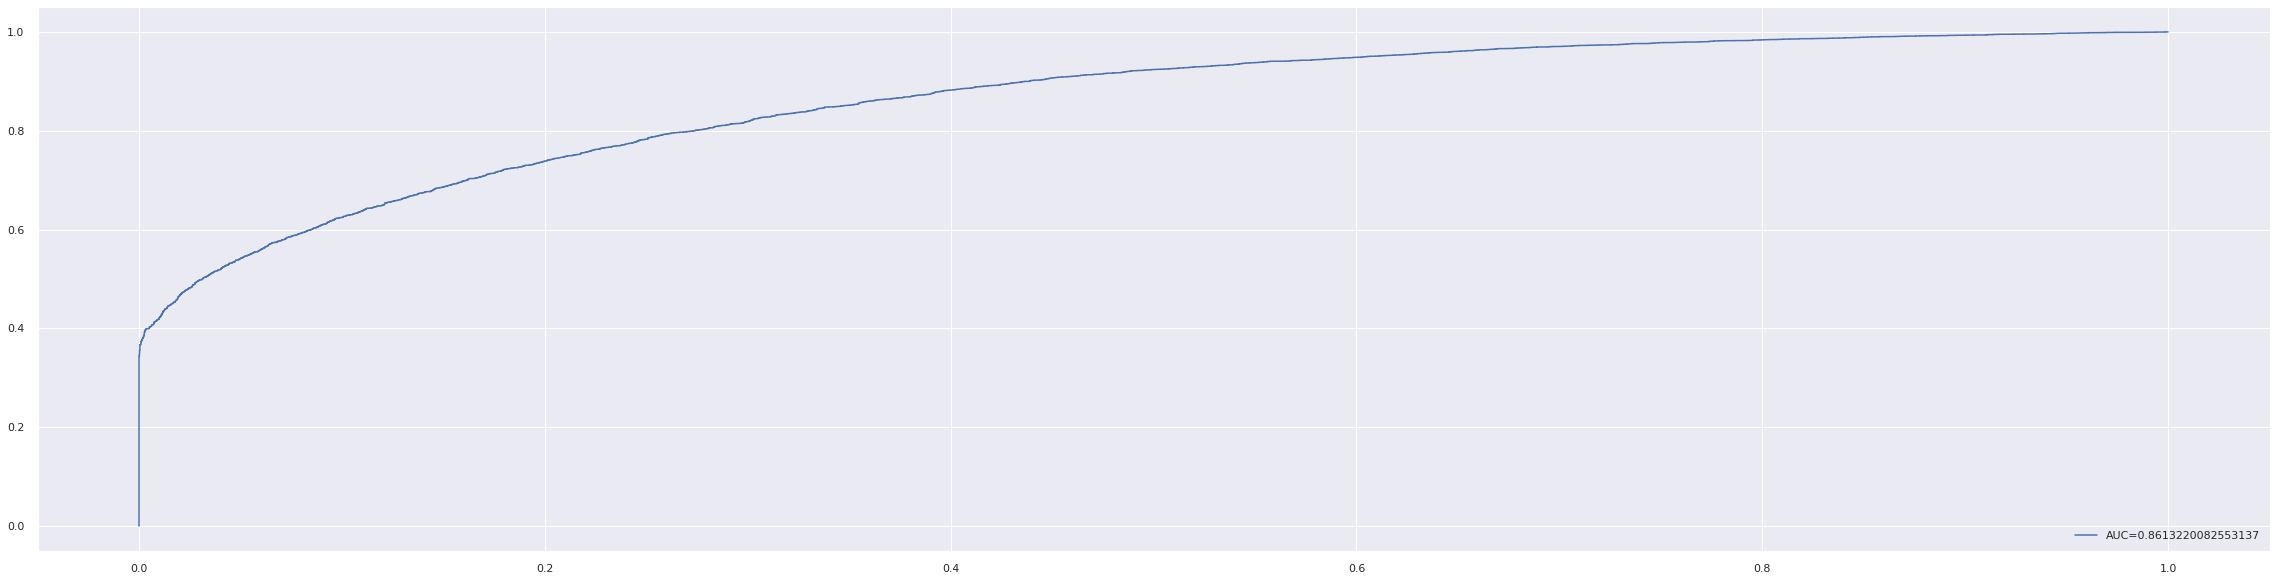

In [215]:
y_pred_proba = log_regression.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.legend(loc=4)
plt.show()

In [216]:
# Metrics: Recall, Precision, F1

print(f"Recall:{recall_score(y_test, y_pred, average='macro').round(2)}")

print(f"Precision :{precision_score(y_test, y_pred, average='macro').round(2)}")

print(f"F1:{f1_score(y_test, y_pred, average='macro').round(2)}")

Recall:0.76
Precision :0.79
F1:0.77


In [217]:
# Separacao entre treino e teste temporal (treino: 2015, 2016 e teste: 2017)

print(""" A separacao por treino e teste em periodos diferentes, pressupõe que nao ocorram mudancas no ecosistema do negócio. 

Um exemplo atual seria a pandemia, usar dados de treino do momento da pandemia e de teste do momento pós-pandemia , nao faz sentido o modelo nao responderia bem. 

Se o ecossistema do negócio permanecer o mesmo os resultados podem ficar semelhantes, mas vai depende de fatores externos os quais  nao temos o controla e as vezes pode ser dificil ate de identifica-los.

Além de eventos como o da pandemia, existe também a questão da sazionalidade, que dificulta o resultado da analise.

Dessa forma eu iria sempre para a separação aleatória. 

""")


 A separacao por treino e teste em periodos diferentes, pressupõe que nao ocorram mudancas no ecosistema do negócio. 

Um exemplo atual seria a pandemia, usar dados de treino do momento da pandemia e de teste do momento pós-pandemia , nao faz sentido o modelo nao responderia bem. 

Se o ecossistema do negócio permanecer o mesmo os resultados podem ficar semelhantes, mas vai depende de fatores externos os quais  nao temos o controla e as vezes pode ser dificil ate de identifica-los.

Além de eventos como o da pandemia, existe também a questão da sazionalidade, que dificulta o resultado da analise.

Dessa forma eu iria sempre para a separação aleatória. 




In [218]:
# Conclusao:

print(f"""                                CONCLUSÃO:

Recomendacoes e acoes  baseadas nos dados :

                                         Ao observar o tempo de antecdencia da reserva:

A porcentagem de clientes que realizaram o cancelamento foi calculada por periodo de tempos segmentados usando informações dos quartis (conforme pode se verificar no describe):

tempo 0 -18 - 25% dos clientes
tempo 19- 69 - 25% dos clientes 
tempo 70 - 160 - 25% dos clientes 
tempo > 160 25% dos clientes
tempo > 380 - outliers 

Observa-se que a taxa de cancelamento cresce a medida em que o tempo entre a reseva e a data de chegada no hotel aumenta. 

Eu sugeriria quatro açõess ao proprietário do hotel: 

1 - Uma ação de marketing com descontos para quem fizesse a reserva para os proximos 20 dias tentando assim aumentar a quantidade de clientes para entrar nessa faixa de cancelamento de 14.64% (hoje temos 25% dos clientes nessa faixa)

2 - A partir do tempo de 70 dias de antecedência já temos uma taxa de cancelamento expressiva, eu sugeriria um pagamento adiantado e se permitido por lei a devolução parcial desse valor em caso de cancelamento.

3 - A partir do tempo de 160 dias tem-se uma desistência de mais de 54% além do citado no item dois sugeriria uma campanha de acompanhamento do cliente, envio de propagandas ações que conseguisse nao deixar esfriar a vontade do cliente em ir para o hotel. Menssagem avisando que o hotel o aguarda ...
pois é um cliente que o hotel não conquistou ainda. 

4- No caso de 380 dias de antecedência para cima, talvez seja mais interessante não abrir reservas, pois gera um custo operacional para empresa e pode perder clientes que mais a frente seriam hóspedes que nao cancelariam. Colocaria esses cllientes na lista de acompanhamento e informaria quando tivesse mais próximo as disponibilidades. 



                                                  Ao observar a quantidade de estadias anteriores:



Ao vermos os valores na tabela abaixo, observa se que tem uma descontinuidade ou seja sao grupos diferentes.


{d_canelamento_num_previous_stays}


o primeiro grupo seria aqueles que nunca estiveram no hotel com uma taxa de cancelamento expressiva em torno de 38% 
e o segundo grupo sao os que ja visitaram o hotel o que faz com que a taxa de cancelamento seja bem menor em torno de 5%.
Esse fato é positivo, indica que os clientes que ja estiveram no hotel , gostaram da experiência uma vez que fazem um esforco maior para não cancelarem.

Eu proporia uma ação para o dono do hotel:

Trabalhar com esses clientes que ja estiveram no hotel, acessando as mídias sociais deles, tentando transforma-los em vetores de propaganda para o hotel.
Possivelmente esses clientes tiveram bons momentos no hotel e teriam prazer em divulgar. Uma acao dessas pode estimular a um novo hóspede a não cancelar.
Tentar manter por perto esses clientes oferecendo descontos (investimento em marketing).
Promocao de indicar um amigo e ganhar um desconto.

                                                                  Modelo de Preditivo

Modelo adotado : Regressao Logistica 
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

                                                                        Métricas

Metricas que sustentam a qualidade do modelo adotado. (obs: nao estou entrando aqui na teoria das metricas, tem na literatura - apenas presentando os resultados)

Matriz de confusao:

Verdadeiros positivos 10329 
Verdadeiros negativos  5054
Falsos Positivos 2883
Falso Negativo 1178

Recall, Precision , F1:

Recall:0.77
Precision :0.8
F1:0.77

Accuracy: 0.79 

AUC: 0.86  


    
                                                          Separação entre treino e teste temporal (treino: 2015, 2016 e teste: 2017)


A separacao por treino e teste em periodos diferentes, pressupõe que nao ocorram mudancas no ecosistema do negócio. 

Um exemplo atual seria a pandemia, usar dados de treino do momento da pandemia e de teste do momento pós-pandemia , nao faz sentido o modelo nao responderia bem. 

Se o ecossistema do negócio permanecer o mesmo os resultados podem ficar semelhantes, mas vai depende de fatores externos os quais  nao temos o controla e as vezes pode ser dificil ate de identifica-los.

Além de eventos como o da pandemia, existe também a questão da sazionalidade, que dificulta o resultado da analise.

Dessa forma eu iria sempre para a separação aleatória. 



                                                                     Trabalhos futuros e sugestões:

O trabalho nao foi levado a exaustao, poderia-se explorar as outras features para mais recomendacoes, com certeza pode-se recomendar mais solucoes. 

Uma coisa que poderia ser feito para uma outa abordagem é estudar se podemos trabalhar de forma diferente para HOTEL e Fancy Hotel. Derrepente sao universos diferentes que podem demandar recomendacoes diferentes, pela questao do tempo nao entrei nesse mérito. 
Mas valeria uma analise de cluster para entender se esses dois modelos de hoteis ficariam em clusters diferentes. Caso afirmativo as analises seriam feitas em duas frentes separadas cluster 1 e cluster2 (Hotel e Fancy Hotel).

Outra sugestao seria tentar reduzir atraves de PCA a quantidade de features. 

sds,
Marcos Alcure 

""")




                                CONCLUSÃO:

Recomendacoes e acoes  baseadas nos dados :

                                         Ao observar o tempo de antecdencia da reserva:

A porcentagem de clientes que realizaram o cancelamento foi calculada por periodo de tempos segmentados usando informações dos quartis (conforme pode se verificar no describe):

tempo 0 -18 - 25% dos clientes
tempo 19- 69 - 25% dos clientes 
tempo 70 - 160 - 25% dos clientes 
tempo > 160 25% dos clientes
tempo > 380 - outliers 

Observa-se que a taxa de cancelamento cresce a medida em que o tempo entre a reseva e a data de chegada no hotel aumenta. 

Eu sugeriria quatro açõess ao proprietário do hotel: 

1 - Uma ação de marketing com descontos para quem fizesse a reserva para os proximos 20 dias tentando assim aumentar a quantidade de clientes para entrar nessa faixa de cancelamento de 14.64% (hoje temos 25% dos clientes nessa faixa)

2 - A partir do tempo de 70 dias de antecedência já temos uma taxa de cancela